# Face data type and format from different face detectors
<center>Shengping Jiang</center>
This notebook explains face rectangle data type and from from dlib hog detector, dlib cnn detector, OpenCV Haar Cascade detector, face_recognition.face_locations and mtcnn.detect_faces()


In [1]:
# Several face detection methods. Running on face1
import numpy as np
import os
import face_recognition as frg
from sklearn.neighbors import KNeighborsClassifier
import re
import math
import mtcnn
import matplotlib.pyplot as plt

In [2]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def show_face(img_path, location):
    #location is a rectangle in order [left,top,right,bottom]
    pil_image = Image.open(img_path).convert("RGB")
    [left,top,right,bottom] = location

    draw = ImageDraw.Draw(pil_image)
    draw.rectangle(((right, top), (left, bottom)), outline=(0, 0, 255))
    display(pil_image)

## Face type and format from dlib.get_frontal_face_detector()
The dlib.get_frontal_face_detector() returns a face detector with HOG model<br>
Type of faces from HOG detector: <class '_dlib_pybind11.rectangles'>. <br>
This is a dlib data type. A two faces example: rectangles[[(79, 130) (154, 204)], [(247, 92) (354, 199)]]. The rectangles looks a python list<br>
Type of face is: <class '_dlib_pybind11.rectangle'>. It is not a python list or tuple. The format is [(left,top) (right, bottom)]. For example: [(79, 130) (154, 204)] <br>
Each number in the rectangle can get in below: <br>
    left = face.left()<br>
    top = face.top()<br>
    right = face.right()<br>
    bottom = face.bottom()<br>
    
## Face type and format from dlib.cnn_face_detection_model_v1(dlib_cnn_model_path)
Type of faces from cnn detector: <class '_dlib_pybind11.mmod_rectangles'>. <br>
This is a dlib data type. A two faces example: mmod_rectangles[[(260, 97) (342, 179)], [(70, 122) (151, 204)]]. <br>
Type of face is: <class '_dlib_pybind11.mmod_rectangle'>. It is not a python list or tuple but a <_dlib_pybind11.mmod_rectangle object>. <br>
Type of face.rect: <class '_dlib_pybind11.rectangle'><br>
The face rectangle is represented as face.rect. The format is [(left,top) (right, bottom)]. For example: [(79, 130) (154, 204)] <br>
Each number in the rectangle can be obtained as below: <br>
    left = face.rect.left()<br>
    top = face.rect.top()<br>
    right = face.rect.right()<br>
    bottom = face.rect.bottom()<br>



type of faces(hog) <class '_dlib_pybind11.rectangles'>
faces(hog): rectangles[[(199, 80) (306, 187)]]
type of face(hog): <class '_dlib_pybind11.rectangle'>
face(hog): [(199, 80) (306, 187)]
Face found with HOG model:


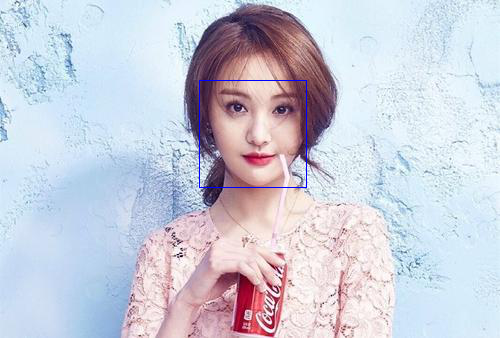

type of faces(cnn) <class '_dlib_pybind11.mmod_rectangles'>
faces(cnn): mmod_rectangles[[(202, 78) (300, 176)]]
type of face.rect(cnn) <class '_dlib_pybind11.rectangle'>
face.rect(cnn): [(202, 78) (300, 176)]
Face found with CNN model:


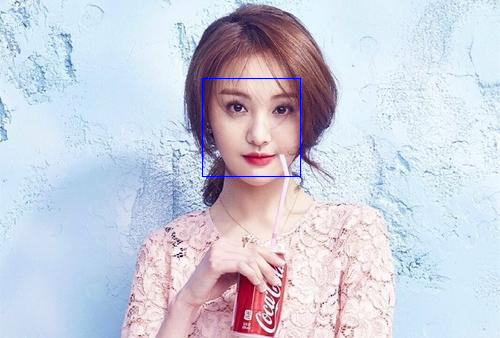

In [3]:
# dlib_hog_face_detector()---dlib.get_frontal_face_detector()

import dlib
import cv2

dlib_hog_face_detector = dlib.get_frontal_face_detector()
dlib_cnn_model_path = 'models/mmod_human_face_detector.dat'
dlib_cnn_face_detector = dlib.cnn_face_detection_model_v1(dlib_cnn_model_path)
#img_path = 'notebook_images/kit_with_rose.jpg'
img_path = 'notebook_images/015.jpg'
img = cv2.imread(img_path)

#Test hog model
# type of face:  <class '_dlib_pybind11.rectangle'>
#_dlib_pybind11.rectangle format: [(left,top) (right,bottom)]
faces = dlib_hog_face_detector(img, 1)
print('type of faces(hog)', type(faces))
print('faces(hog):',faces)

#to draw faces on image

for face in faces:
    print('type of face(hog):', type(face))
    print('face(hog):',face)
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    location = [left,top,right,bottom]
    #print("type of location:",type(location))
    #print("location:",location)
    print("Face found with HOG model:")
    show_face(img_path, location)
    
# test cnn model
# type of face:  <class '_dlib_pybind11.mmod_rectangle'>
#_dlib_pybind11.mmod_rectangle.rect -> [(left,top) (right,bottom)]
faces = dlib_cnn_face_detector(img, 1) # result
print('type of faces(cnn)', type(faces))
print('faces(cnn):',faces)
#to draw faces on image

for face in faces:
    print('type of face.rect(cnn)', type(face.rect))
    print('face.rect(cnn):',face.rect)
    left = face.rect.left()
    top = face.rect.top()
    right = face.rect.right()
    bottom = face.rect.bottom()
    location = [left,top,right,bottom]
    #print("type of location:",type(location))
    #print("location:",location)
    print("Face found with CNN model:")
    show_face(img_path, location)

## Face data type and format from OpenCV cv2.CascadeClassifier
type of faces(openCV): <class 'numpy.ndarray'><br>
faces format(openCV): [[ 75 117  87  87] [244  89 105 105]]<br>
type of face(openCV): <class 'numpy.ndarray'><br>
face format(openCV): [left top width height]. for example: [ 75 117  87  87]<br>
Get each number of a face rectangle as below:<br>
left, top, width, height = face<br>

type of faces(openCV): <class 'numpy.ndarray'>
faces format(openCV): [[89 24 84 84]]
type of face(openCV): <class 'numpy.ndarray'>
face format(openCV): [89 24 84 84]


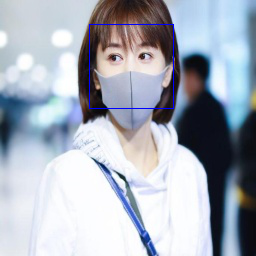

In [4]:
# Haar Cascade
# https://towardsdatascience.com/face-detection-models-which-to-use-and-why-d263e82c302c

import cv2
classifier = cv2.CascadeClassifier('models/haarcascade_frontalface_alt2.xml')
#img_path = 'notebook_images/kit_with_rose.jpg'
img_path = 'notebook_images/001.jpg'
img = cv2.imread(img_path)
faces = classifier.detectMultiScale(img)# result
print('type of faces(openCV):', type(faces))
print('faces format(openCV):',faces)    
    
# type of face(openCV): <class 'numpy.ndarray'>
# face format(openCV): [x y w h]
#to draw faces on image
for face in faces:
    print('type of face(openCV):', type(face))
    print('face format(openCV):',face)    
    x, y, w, h = face
    location = [x, y, x+w,y+h]
    show_face(img_path, location)

## Face data type and format from face_recognition.face_locations are as below: 
Faces (if more than one face found) is a list of tuples. Each tuple has four numbers which is a face rectangle. Example: [(130, 154, 204, 79), (92, 354, 199, 247)] (two face rectangles).<br>
Each face rectangle is in format: (top, right, bottom, left). For example: (130, 154, 204, 79)<br>
When use ace_recognition, Face data type and format are same either use hog model or cnn model

type of faces: <class 'list'>
faces: [(130, 154, 204, 79), (92, 354, 199, 247)]
type of face(hog): <class 'tuple'>
face(hog): (130, 154, 204, 79)
top, right, bottom, left: 130 154 204 79
Face found with HOG model:


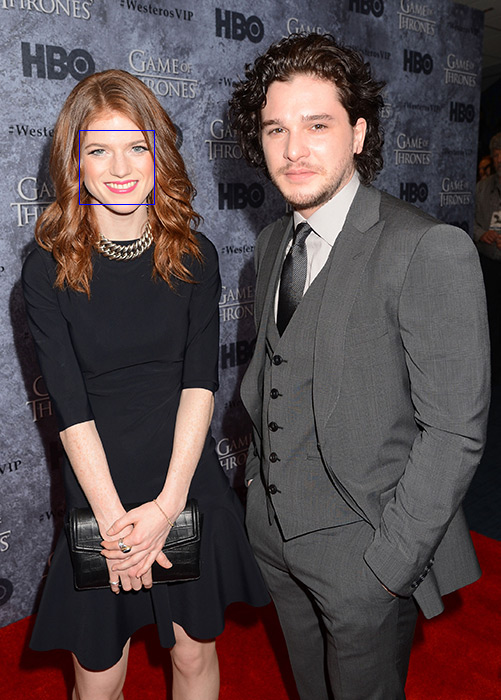

type of face(hog): <class 'tuple'>
face(hog): (92, 354, 199, 247)
top, right, bottom, left: 92 354 199 247
Face found with HOG model:


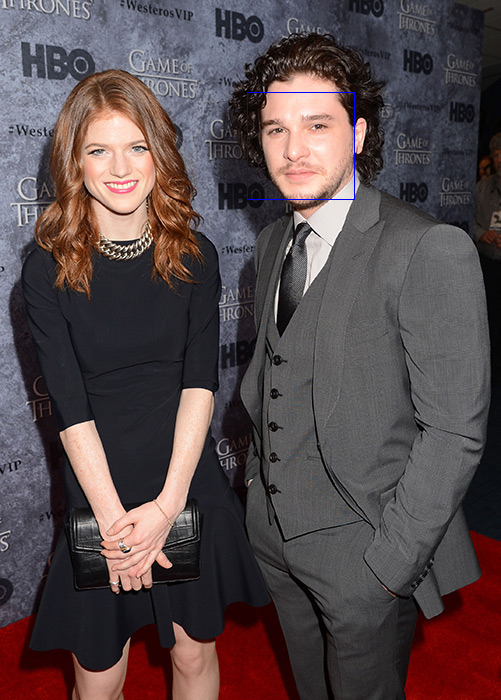

In [8]:
# face_recognition
# Face rectangles detected by HOG model
import face_recognition as frg

img_path = 'notebook_images/kit_with_rose.jpg'
img = cv2.imread(img_path)

#Use face_recognition.face_locations(image, model='hog')
#format: A list of tuples face locations (top, right, bottom, left)
faces = frg.face_locations(img, model='hog')
print('type of faces:', type(faces))
print('faces:',faces)

for face in faces:
    print('type of face(hog):', type(face))
    print('face(hog):',face)
    # you can use [top, right, bottom, left] = face, (top, right, bottom, left) = face
    # and below method to get each number
    top, right, bottom, left = face
    print('top, right, bottom, left:',top, right, bottom, left)
    # change to location format of show_face()
    location = [left, top, right, bottom]
    print("Face found with HOG model:")
    show_face(img_path, location)





type of faces: <class 'list'>
faces: [(97, 342, 179, 260), (122, 151, 204, 70)]
type of face(cnn): <class 'tuple'>
face(cnn): (97, 342, 179, 260)
top, right, bottom, left: 97 342 179 260
Face found with CNN model:


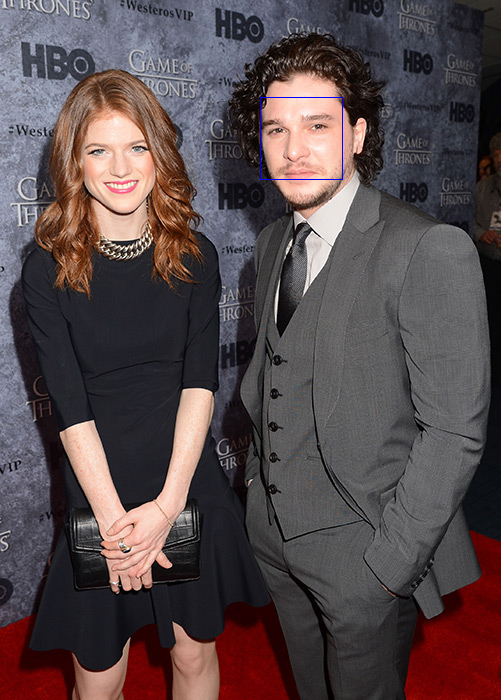

type of face(cnn): <class 'tuple'>
face(cnn): (122, 151, 204, 70)
top, right, bottom, left: 122 151 204 70
Face found with CNN model:


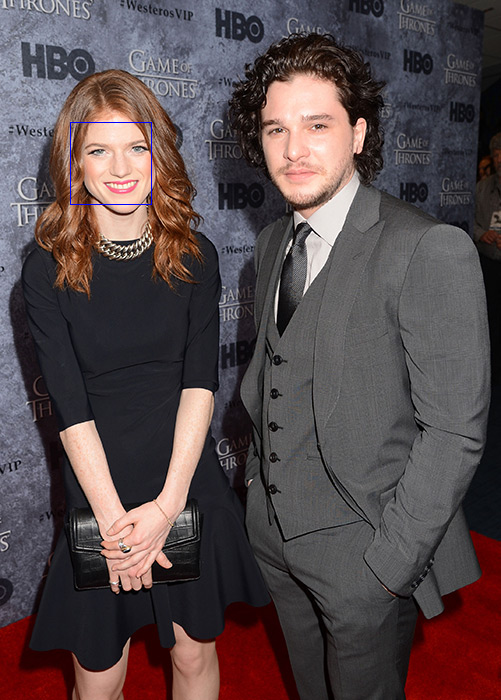

In [9]:
# face_recognition
# Face rectangles detected by CNN model
import face_recognition as frg

img_path = 'notebook_images/kit_with_rose.jpg'
img = cv2.imread(img_path)

#Use face_recognition.face_locations(image, model='cnn')
#format: A list of tuples face locations (top, right, bottom, left)
faces = frg.face_locations(img, model='cnn')
print('type of faces:', type(faces))
print('faces:',faces)

for face in faces:
    print('type of face(cnn):', type(face))
    print('face(cnn):',face)
    # you can use [top, right, bottom, left] = face, (top, right, bottom, left) = face
    # and below method to get each number
    top, right, bottom, left = face
    print('top, right, bottom, left:',top, right, bottom, left)
    # change to location format of show_face()
    location = [left, top, right, bottom]
    print("Face found with CNN model:")
    show_face(img_path, location)


## Face data type and format from mtcnn.detect_faces(img)
1 The type of faces is a list. But each element (face) of the list is a dict(字典). The format of faces is [{...},{...},...{...}] <br>
The face rectangle is the value of key 'box' of a dict. It is face['box'] while face is an element of faces<br>
The face['box'] is a list of four numbers. It is in format [left, top, width, height]. For example: face['box']: [78, 112, 74, 95]

type of faces: <class 'list'>
faces: [{'box': [432, 177, 449, 581], 'confidence': 0.9973528385162354, 'keypoints': {'left_eye': (560, 400), 'right_eye': (755, 410), 'nose': (652, 526), 'mouth_left': (538, 593), 'mouth_right': (763, 604)}}]
Type of face(mtcnn): <class 'dict'>
format of face(mtcnn): {'box': [432, 177, 449, 581], 'confidence': 0.9973528385162354, 'keypoints': {'left_eye': (560, 400), 'right_eye': (755, 410), 'nose': (652, 526), 'mouth_left': (538, 593), 'mouth_right': (763, 604)}}
type of face['box']: <class 'list'>
face['box']: [432, 177, 449, 581]
x, y, w, h: 432 177 449 581
locations: [432, 177, 881, 758]


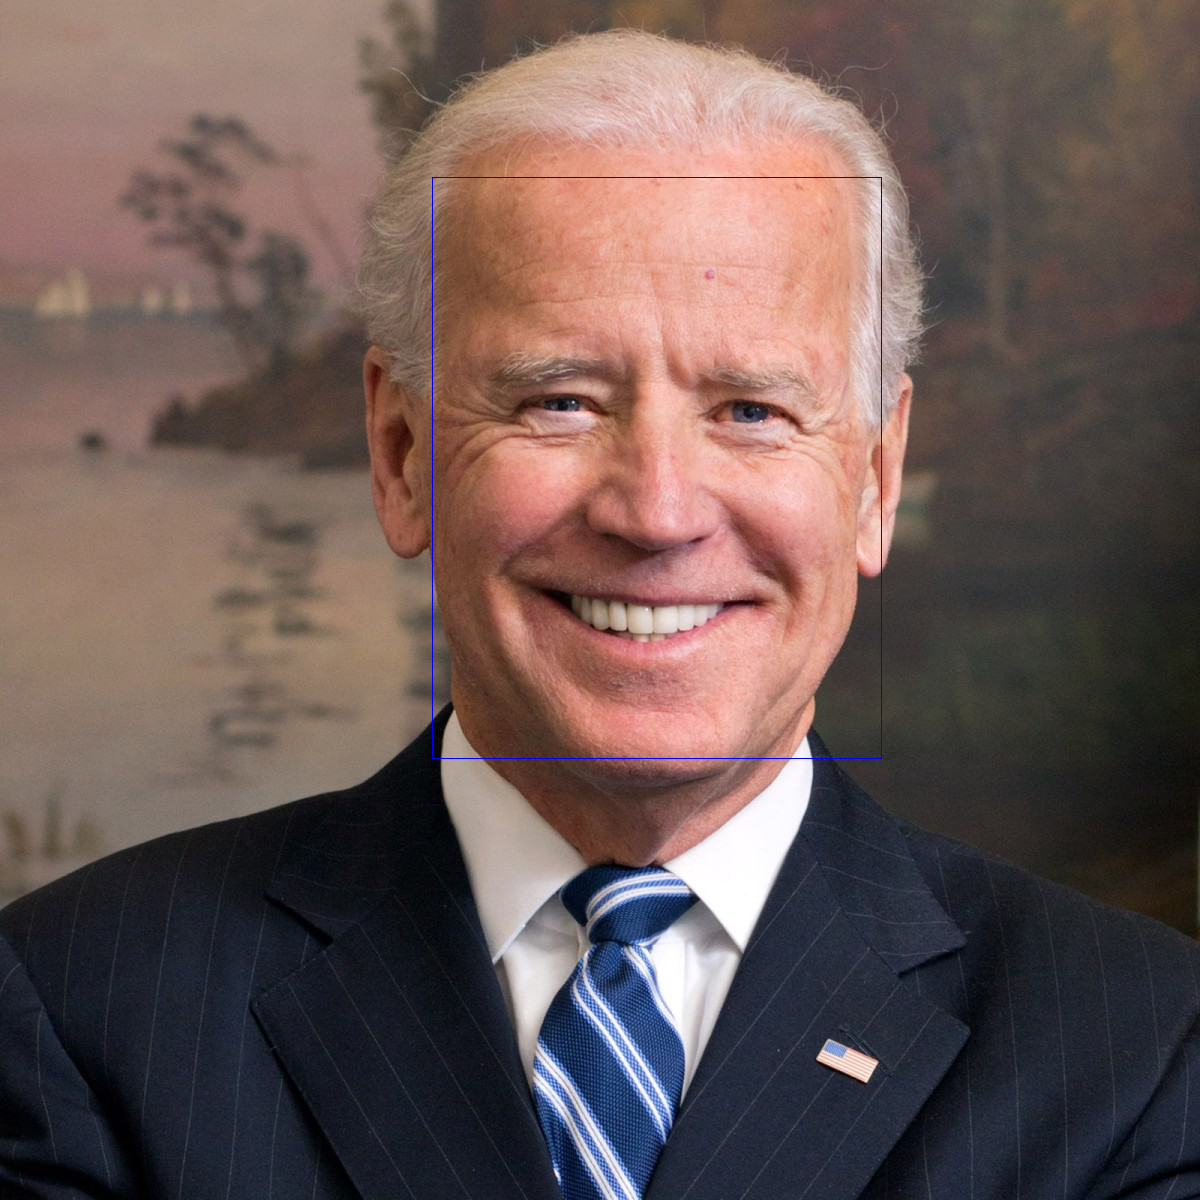

In [11]:
# mtcnn
import mtcnn

img_path = 'notebook_images/biden2.jpg'
#img_path = 'notebook_images/kit_with_rose.jpg'
img = cv2.imread(img_path)

detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(img)
print('type of faces:',type(faces))
print('faces:',faces)
for face in faces:
    # get coordinates
    print('Type of face(mtcnn):',type(face))
    print('format of face(mtcnn):',face)
    print("type of face['box']:",type(face['box']))
    print("face['box']:",face['box'])
    x, y, w, h = face['box']
    print('x, y, w, h:',x, y, w, h)
    #change to location of show_face()--[left, top, right, bottom]
    location = [x, y, x+w, y+h]
    print('locations:',location)
    show_face(img_path, location)


